In [4]:
using AutomotiveDrivingModels
using AutoViz
using AutomotiveSensors
using AutomotivePOMDPs
using Parameters
using StaticArrays
using ProfileView

using GridInterpolations 
using POMDPs
using POMDPToolbox
using QMDP
using JLD


In [11]:
include("../src/pedestrian_crossing/pomdp_types.jl")
include("../src/pedestrian_crossing/spaces.jl")
include("../src/pedestrian_crossing/transition.jl")
include("../src/pedestrian_crossing/observation.jl")
include("../src/pedestrian_crossing/belief.jl")
include("../src/pedestrian_crossing/policy.jl")
include("../src/pedestrian_crossing/frenet_pedestrian_pomdp.jl")
include("../src/pedestrian_crossing/helpers.jl")

animate_record (generic function with 2 methods)

In [12]:
pomdp = SingleOCFPOMDP()
println(n_states(pomdp))
solver = QMDPSolver(max_iterations=10, tolerance=1e-3, verbose=true) 
@requirements_info solver pomdp

# run the solver
qmdp_policy = solve(solver, pomdp)

JLD.save("policy_tmp.jld", "policy", qmdp_policy)

107251

INFO: POMDPs.jl requirements for solve(::QMDPSolver, ::POMDPs.POMDP) and dependencies. ([✔] = implemented correctly; [X] = missing)

For solve(::QMDPSolver, ::POMDPs.POMDP):
  [No additional requirements]
For solve(::ValueIterationSolver, ::Union{POMDPs.MDP,POMDPs.POMDP}) (in solve(::QMDPSolver, ::POMDPs.POMDP)):
  [✔] discount(::SingleOCFPOMDP)
  [✔] n_states(::SingleOCFPOMDP)
  [✔] n_actions(::SingleOCFPOMDP)
  [✔] transition(::SingleOCFPOMDP, ::SingleOCFState, ::SingleOCFAction)
  [✔] reward(::SingleOCFPOMDP, ::SingleOCFState, ::SingleOCFAction, ::SingleOCFState)
  [✔] state_index(::SingleOCFPOMDP, ::SingleOCFState)
  [✔] action_index(::SingleOCFPOMDP, ::SingleOCFAction)
  [✔] actions(::SingleOCFPOMDP, ::SingleOCFState)
  [✔] iterator(::Array)
  [✔] iterator(::Array)
  [✔] iterator(::SparseCat)
  [✔] pdf(::SparseCat, ::SingleOCFState)
For ordered_states(::Union{POMDPs.MDP,POMDPs.POMDP}) (in solve(::ValueIterationSolver, ::Union{POMDPs.MDP,POMDPs.POMDP})):
  [✔] states(::Sing

Progress:   7%|███                                      |  ETA: 0:02:47

Progress:  13%|█████                                    |  ETA: 0:02:43

Progress:  17%|███████                                  |  ETA: 0:03:09

Progress:  22%|█████████                                |  ETA: 0:02:53

Progress:  27%|███████████                              |  ETA: 0:02:40

Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:01

[Iteration 1   ] residual:        805 | iteration runtime: 239088.391 ms, (       239 s total)


Progress: 100%|█████████████████████████████████████████| Time: 0:03:59


Progress:  11%|████                                     |  ETA: 0:03:03

Progress:  17%|███████                                  |  ETA: 0:02:49

Progress:  22%|█████████                                |  ETA: 0:02:40

Progress:  28%|███████████                              |  ETA: 0:02:29

Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:05

[Iteration 2   ] residual:        522 | iteration runtime: 223044.393 ms, (       462 s total)


Progress: 100%|█████████████████████████████████████████| Time: 0:03:43
Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:04

[Iteration 3   ] residual:        377 | iteration runtime: 216917.496 ms, (       679 s total)


Progress: 100%|█████████████████████████████████████████| Time: 0:03:37
Progress:  97%|████████████████████████████████████████ |  ETA: 0:00:05

[Iteration 4   ] residual:        285 | iteration runtime: 208999.900 ms, (       888 s total)


Progress: 100%|█████████████████████████████████████████| Time: 0:03:29
Progress:  97%|████████████████████████████████████████ |  ETA: 0:00:06

[Iteration 5   ] residual:        224 | iteration runtime: 211651.307 ms, (  1.1E+03 s total)


Progress: 100%|█████████████████████████████████████████| Time: 0:03:32
Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:00

[Iteration 6   ] residual:        174 | iteration runtime: 211970.955 ms, (  1.31E+03 s total)


Progress: 100%|█████████████████████████████████████████| Time: 0:03:32


Progress:  13%|█████                                    |  ETA: 0:02:50

Progress:  19%|████████                                 |  ETA: 0:02:38

Progress:  25%|██████████                               |  ETA: 0:02:26

Progress:  97%|████████████████████████████████████████ |  ETA: 0:00:07

[Iteration 7   ] residual:        131 | iteration runtime: 211235.478 ms, (  1.52E+03 s total)


Progress: 100%|█████████████████████████████████████████| Time: 0:03:31
Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:05

[Iteration 8   ] residual:        105 | iteration runtime: 209973.682 ms, (  1.73E+03 s total)


Progress: 100%|█████████████████████████████████████████| Time: 0:03:30
Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:04

[Iteration 9   ] residual:       90.2 | iteration runtime: 212764.238 ms, (  1.95E+03 s total)


Progress: 100%|█████████████████████████████████████████| Time: 0:03:33
Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:01

[Iteration 10  ] residual:       79.2 | iteration runtime: 245754.598 ms, (  2.19E+03 s total)


Progress: 100%|█████████████████████████████████████████| Time: 0:04:06


In [17]:
pomdp = SingleOCFPOMDP()

policy = load("policy_tmp.jld")["policy"];
println(fieldnames(policy))
policy.action_map

b = SparseCat([SingleOCFState(0.0, 10.0, 46.0, 4.0, 1.57, 0.0)],[1.])
#b = SparseCat([get_state_absent(pomdp, 0., 17.)], [1.])
action(policy,b)

Symbol[:pomdp, :alphas, :action_map]


2-element SingleOCFAction:
 1.0
 0.0

In [53]:
#=
1.07692
  2.15385
  3.23077
  4.30769
  5.38462
  6.46154
  7.53846
  8.61538
=#

b = SparseCat([SingleOCFState(-0.4, 11.0, 30.0, 5.0, 1.57, 0.0)],[1.])
act = action(policy, b) # policy

#s = SingleOCFState(0.0, 4.3076923076923075, 40.0, 4.0, 1.57, 1.5)
#sp = SingleOCFState(0.0, 4.3076923076923075, 40.0, 4.0, 1.57, 1.5)

#act = SingleOCFAction(-4.0, 0.0)
#reward(pomdp, s, act, sp) 

2-element SingleOCFAction:
 0.0
 1.0

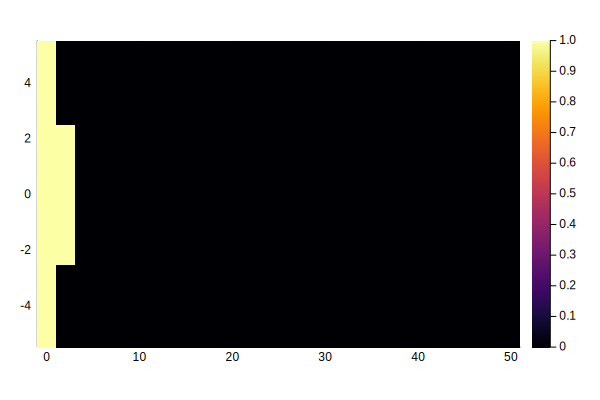

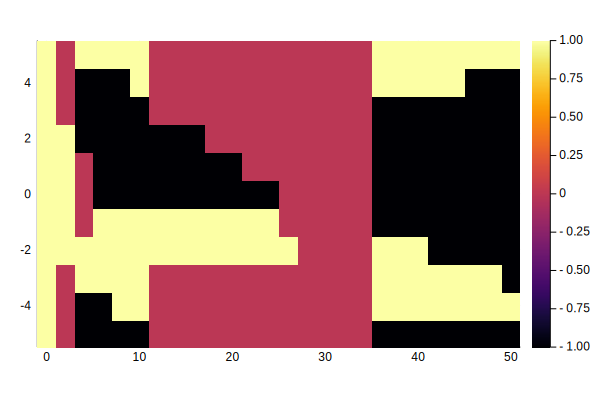

In [54]:
using Interact
using Plots
gr()

policy_grid = Matrix(length(pomdp.T_RANGE),length(pomdp.S_RANGE))

#=@manipulate for ego_v in pomdp.EGO_V_RANGE
    @manipulate for ped_v in pomdp.PED_V_RANGE
=#
    ego_v = 11.0
    ped_v = 0.0
    for i=1:length(pomdp.T_RANGE)
        ped_t = pomdp.T_RANGE[i]
        for j=1:length(pomdp.S_RANGE)
            ped_s = pomdp.S_RANGE[j]
            b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, 1.57, ped_v)],[1.])
            act = action(policy, b) 
          #  println(ped_s, "/", ped_t, " act: ", act.acc)
            policy_grid[i,j] = act.acc
        end
    end

    xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
    ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]

    display(heatmap(xs,ys,policy_grid,aspect_ratio=3))



    for i=1:length(pomdp.T_RANGE)
        ped_t = pomdp.T_RANGE[i]
        for j=1:length(pomdp.S_RANGE)
            ped_s = pomdp.S_RANGE[j]
            b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, 1.57, ped_v)],[1.])
            act = action(policy, b) 
          #  println(ped_s, "/", ped_t, " act: ", act.acc)
            policy_grid[i,j] = act.lateral_movement
        end
    end

    xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
    ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
    display(heatmap(xs,ys,policy_grid,aspect_ratio=3))
#=

    end
end

=#


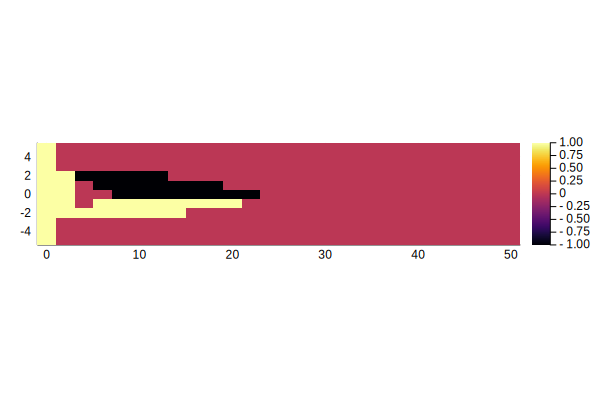

In [12]:
using Interact
using Plots
gr()

policy_grid = Matrix(length(pomdp.T_RANGE),length(pomdp.S_RANGE))

#=
@manipulate for ego_v in pomdp.EGO_V_RANGE
    @manipulate for ped_v in pomdp.PED_V_RANGE
=#
    ego_v = 9.0
    ped_v = 0.0
    for i=1:length(pomdp.T_RANGE)
        ped_t = pomdp.T_RANGE[i]
        for j=1:length(pomdp.S_RANGE)
            ped_s = pomdp.S_RANGE[j]
            b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, 1.57, ped_v)],[1.])
            act = action(policy, b) 
          #  println(ped_s, "/", ped_t, " act: ", act.acc)
            policy_grid[i,j] = act.lateral_movement
        end
    end

    xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
    ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
    heatmap(xs,ys,policy_grid,aspect_ratio=1)

#=
    end
end
=#

In [44]:
# Test action space
action_space = actions(pomdp)
n_actions(pomdp)
x = action_space[action_index(pomdp,SingleOCFAction(-4.0, 0.0) )]
println(x)

cnt = 0
for (index, a) in enumerate(pomdp.action_space)
    idx = action_index(pomdp,a)
    if (idx != index)
        println("error")
        cnt = cnt + 1
    end
    println(a)
end
println(cnt)


SingleOCFAction(-4.0, 0.0)
SingleOCFAction(1.0, 0.0)
SingleOCFAction(0.0, 0.0)
SingleOCFAction(-1.0, 0.0)
SingleOCFAction(-2.0, 0.0)
SingleOCFAction(-4.0, 0.0)
0


In [50]:
state_space = states(pomdp)

state_space[state_index(pomdp,SingleOCFState(0.0, 4, 40.0, 0.0, 1.57, 1.5))]

SingleOCFState(0.0, 4.3076923076923075, 40.0, 0.0, 1.57, 1.5)

In [23]:

s = SingleOCFState(0.0, 4.3076923076923075, 40.0, 4.0, 1.57, 1.5)
sp = SingleOCFState(0.0, 4.3076923076923075, 40.0, 4.0, 1.57, 1.5)

act = SingleOCFAction(0.0, 1.0)
reward(pomdp, s, act, sp) 

-1.0

In [31]:
rng = MersenneTwister(1);

hr = HistoryRecorder(max_steps=100, rng=rng)
up = PreviousObservationUpdater() 
s0 = initial_state(pomdp, rng) 

b0 = initBeliefPedestrian(pomdp, s0)
updater = DiscreteUpdater(pomdp)

hist = simulate(hr, pomdp, qmdp_policy, up, b0, s0)

LoadError: [91mMethodError: no method matching POMDPToolbox.PreviousObservationUpdater()[39m

In [17]:
pomdp.EGO_V_RANGE

15-element Array{Float64,1}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
 13.0
 14.0

3-element Array{Float64,1}:
 -1.0
  0.0
  1.0

In [4]:
actions(pomdp)

5-element Array{SingleOCFAction,1}:
 [1.0, 0.0] 
 [0.0, 0.0] 
 [-1.0, 0.0]
 [-2.0, 0.0]
 [-4.0, 0.0]